# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 17.4 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
print("df_hh_income")
print(df_hh_income.shape)
print(df_hh_income.columns)

print("")

print("df_pct_poverty")
print(df_pct_poverty.shape)
print(df_pct_poverty.columns)

print("")

print("df_pct_completed_hs")
print(df_pct_completed_hs.shape)
print(df_pct_completed_hs.columns)

print("")

print("df_share_race_city")
print(df_share_race_city.shape)
print(df_share_race_city.columns)

print("")

print("df_fatalities")
print(df_fatalities.shape)
print(df_fatalities.columns)

df_hh_income
(29322, 3)
Index(['Geographic Area', 'City', 'Median Income'], dtype='object')

df_pct_poverty
(29329, 3)
Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')

df_pct_completed_hs
(29329, 3)
Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')

df_share_race_city
(29268, 7)
Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')

df_fatalities
(2535, 14)
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


In [6]:
print("df_hh_income")
print(f"NaN values? {df_hh_income.isna().values.any()}")
print(f"Duplicates? {df_hh_income.duplicated().values.any()}")

print("")

print("df_pct_poverty")
print(f"NaN values? {df_pct_poverty.isna().values.any()}")
print(f"Duplicates? {df_pct_poverty.duplicated().values.any()}")

print("")

print("df_pct_completed_hs")
print(f"NaN values? {df_pct_completed_hs.isna().values.any()}")
print(f"Duplicates? {df_pct_completed_hs.duplicated().values.any()}")

print("")

print("df_share_race_city")
print(f"NaN values? {df_share_race_city.isna().values.any()}")
print(f"Duplicates? {df_share_race_city.duplicated().values.any()}")

print("")

print("df_fatalities")
print(f"NaN values? {df_fatalities.isna().values.any()}")
print(f"Duplicates? {df_fatalities.duplicated().values.any()}")

df_hh_income
NaN values? True
Duplicates? False

df_pct_poverty
NaN values? False
Duplicates? False

df_pct_completed_hs
NaN values? False
Duplicates? False

df_share_race_city
NaN values? False
Duplicates? False

df_fatalities
NaN values? True
Duplicates? False


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [7]:
df_hh_income = df_hh_income[df_hh_income["Median Income"].notna()]
df_hh_income

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667
...,...,...,...
29314,WY,Wheatland town,34984
29316,WY,Wilson CDP,94792
29318,WY,Worland city,41523
29319,WY,Wright town,77114


In [8]:
df_fatalities = df_fatalities[df_fatalities['age'].notna()]
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,2819,Brian J. Skinner,28/07/17,shot,knife,32.00,M,NaN,Glenville,NY,True,other,Not fleeing,False
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [10]:
df_pct_poverty["poverty_rate"] = df_pct_poverty["poverty_rate"].str.replace("-","0")
df_pct_poverty["poverty_rate"] = df_pct_poverty["poverty_rate"].astype(float)
df_pct_poverty_by_state = df_pct_poverty.groupby("Geographic Area")["poverty_rate"].mean().rename_axis("state").reset_index(name='poverty_rate')

In [11]:
df_pct_poverty_by_state = df_pct_poverty_by_state.sort_values(by=["poverty_rate"], axis=0, ascending=False)

bar = px.bar(
    x=df_pct_poverty_by_state["state"],
    y=df_pct_poverty_by_state["poverty_rate"],
    title="Average US States Poverty Rate",
    hover_name=df_pct_poverty_by_state["state"],
    color=df_pct_poverty_by_state["poverty_rate"],
    color_continuous_scale="Agsunset"
)

bar.update_layout(
    xaxis_title="US State",
    yaxis_title="Ave Poverty Rate",
    coloraxis_showscale=False
)

bar.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [12]:
df_pct_completed_hs["percent_completed_hs"] = df_pct_completed_hs["percent_completed_hs"].str.replace("-","0")
df_pct_completed_hs["percent_completed_hs"] = df_pct_completed_hs["percent_completed_hs"].astype(float)
df_pct_completed_hs_by_state = df_pct_completed_hs.groupby("Geographic Area")["percent_completed_hs"].mean().rename_axis("state").reset_index(name='percent_completed_hs')
df_pct_completed_hs_by_state

,state,percent_completed_hs
0,AK,80.10
1,AL,80.16
2,AR,79.95
3,AZ,79.22
4,CA,80.82
5,CO,88.93
6,CT,91.59
7,DC,89.30
8,DE,88.52
9,FL,85.46


In [13]:
df_pct_completed_hs_by_state = df_pct_completed_hs_by_state.sort_values(by=["percent_completed_hs"], axis=0, ascending=False)

bar = px.bar(
    x=df_pct_completed_hs_by_state["state"],
    y=df_pct_completed_hs_by_state["percent_completed_hs"],
    title="Average US States HS Graduation Rate",
    hover_name=df_pct_completed_hs_by_state["state"],
    color=df_pct_completed_hs_by_state["percent_completed_hs"],
    color_continuous_scale="Agsunset"
)

bar.update_layout(
    xaxis_title="US State",
    yaxis_title="Ave HS Graduation Rate Rate",
    coloraxis_showscale=False
)


# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

Text(0, 0.5, 'Graduation Rate')

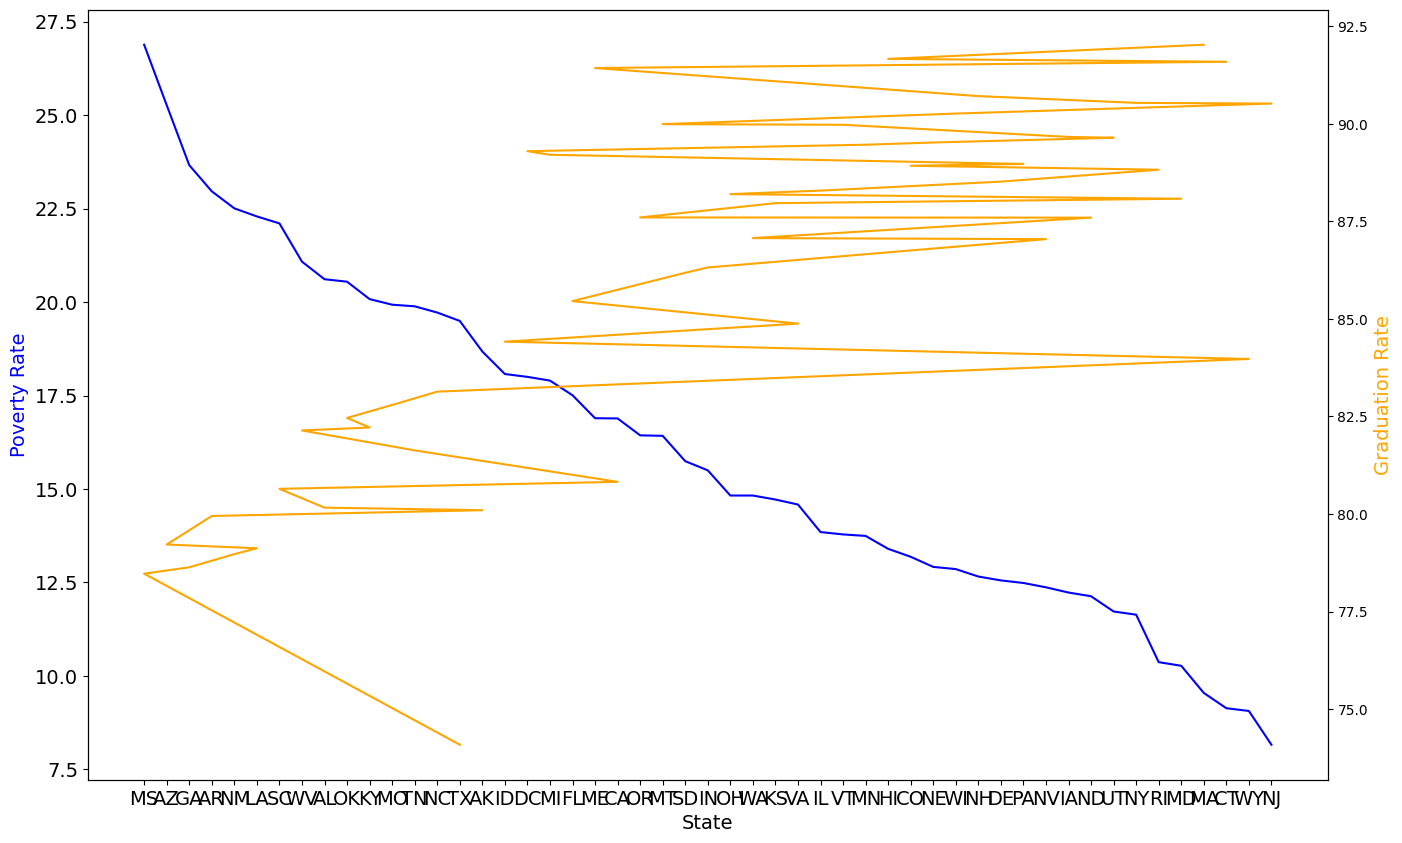

In [14]:
# Setup figure
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax1 = plt.gca()
ax2 = ax1.twinx()

# Plot
ax1.plot(df_pct_poverty_by_state["state"], df_pct_poverty_by_state["poverty_rate"], color="blue")
ax2.plot(df_pct_completed_hs_by_state["state"], df_pct_completed_hs_by_state["percent_completed_hs"], color="orange")

# Styling
ax1.set_xlabel("State", fontsize=14)
ax1.set_ylabel("Poverty Rate", fontsize=14, color="blue")
ax2.set_ylabel("Graduation Rate", fontsize=14, color="orange")

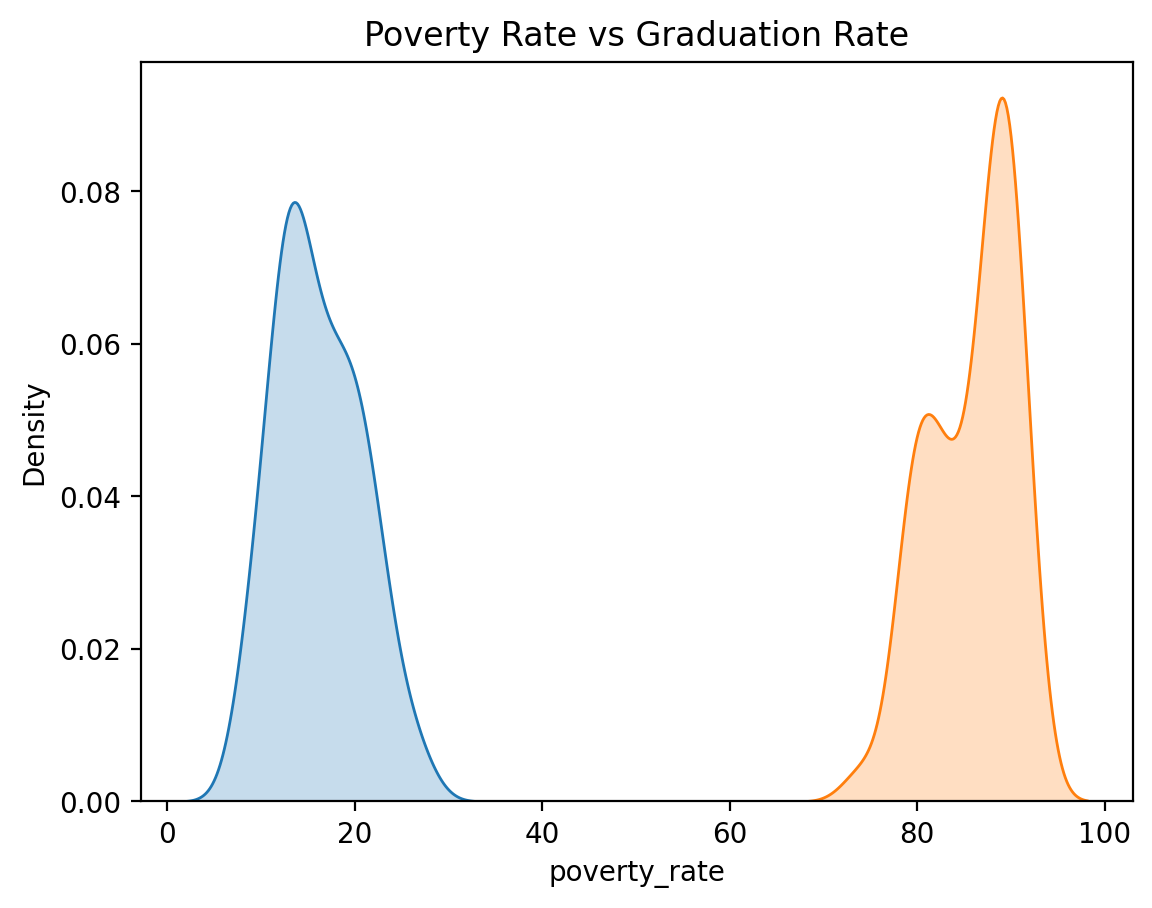

In [16]:
plt.figure(dpi=200)

sns.kdeplot(
    df_pct_poverty_by_state["poverty_rate"],
    fill=True
)

sns.kdeplot(
    df_pct_completed_hs_by_state["percent_completed_hs"],
    fill=True
)

plt.title("Poverty Rate vs Graduation Rate")

plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

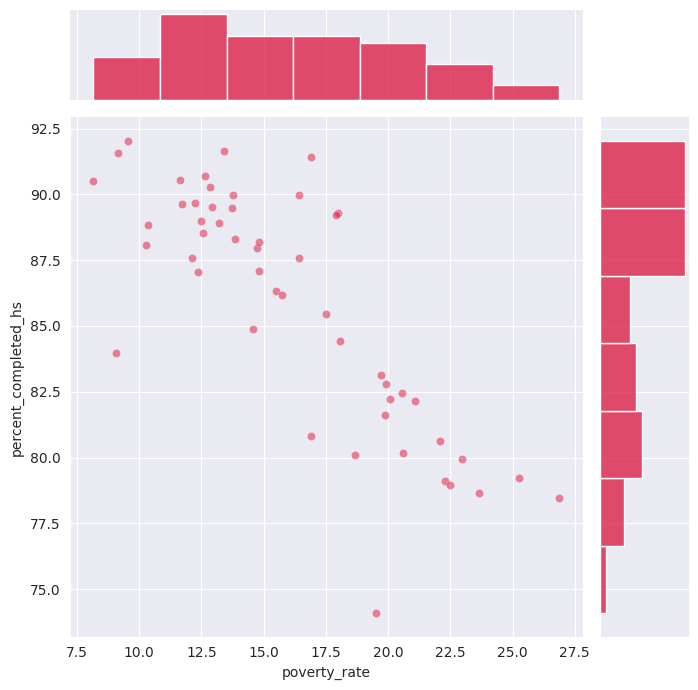

In [17]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=df_pct_poverty_by_state["poverty_rate"],
                y=df_pct_completed_hs_by_state["percent_completed_hs"],
                height=7,
                color='crimson',
                joint_kws={'alpha':0.5})
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [18]:
df_share_race_city["share_white"] = df_share_race_city["share_white"].str.replace("(","")
df_share_race_city["share_white"] = df_share_race_city["share_white"].str.replace(")","")
df_share_race_city["share_white"] = df_share_race_city["share_white"].str.replace("X","0")

df_share_race_city["share_black"] = df_share_race_city["share_black"].str.replace("(","")
df_share_race_city["share_black"] = df_share_race_city["share_black"].str.replace(")","")
df_share_race_city["share_black"] = df_share_race_city["share_black"].str.replace("X","0")

df_share_race_city["share_native_american"] = df_share_race_city["share_native_american"].str.replace("(","")
df_share_race_city["share_native_american"] = df_share_race_city["share_native_american"].str.replace(")","")
df_share_race_city["share_native_american"] = df_share_race_city["share_native_american"].str.replace("X","0")

df_share_race_city["share_asian"] = df_share_race_city["share_asian"].str.replace("(","")
df_share_race_city["share_asian"] = df_share_race_city["share_asian"].str.replace(")","")
df_share_race_city["share_asian"] = df_share_race_city["share_asian"].str.replace("X","0")

df_share_race_city["share_hispanic"] = df_share_race_city["share_hispanic"].str.replace("(","")
df_share_race_city["share_hispanic"] = df_share_race_city["share_hispanic"].str.replace(")","")
df_share_race_city["share_hispanic"] = df_share_race_city["share_hispanic"].str.replace("X","0")

df_share_race_city["share_white"] = df_share_race_city["share_white"].astype(float)
df_share_race_city["share_black"] = df_share_race_city["share_black"].astype(float)
df_share_race_city["share_native_american"] = df_share_race_city["share_black"].astype(float)
df_share_race_city["share_asian"] = df_share_race_city["share_black"].astype(float)
df_share_race_city["share_hispanic"] = df_share_race_city["share_black"].astype(float)

df_share_race_city_by_state = df_share_race_city.groupby(["Geographic area"], as_index=False).agg({"share_white": pd.Series.mean, "share_black": pd.Series.mean, "share_native_american": pd.Series.mean, "share_asian": pd.Series.mean, "share_hispanic": pd.Series.mean})
df_share_race_city_by_state

,Geographic area,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AK,45.26,0.56,0.56,0.56,0.56
1,AL,72.51,23.32,23.32,23.32,23.32
2,AR,78.45,16.30,16.30,16.30,16.30
3,AZ,59.93,0.95,0.95,0.95,0.95
4,CA,71.54,2.68,2.68,2.68,2.68
5,CO,87.77,0.92,0.92,0.92,0.92
6,CT,86.11,4.99,4.99,4.99,4.99
7,DC,38.50,50.70,50.70,50.70,50.70
8,DE,76.25,15.39,15.39,15.39,15.39
9,FL,78.67,13.37,13.37,13.37,13.37


In [19]:
bar = px.bar(
    df_share_race_city_by_state,
    x="Geographic area",
    y=["share_white", "share_black", "share_native_american", "share_asian", "share_hispanic"],
    title="Percent Race by US State",
    labels={"value": "percent", "variable": "race"}
)

bar.update_layout(
    xaxis_title="US State",
    yaxis_title="Percent Race",
    coloraxis_showscale=False
)

bar.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [20]:
fatalities_by_race = df_fatalities["race"].value_counts()

fig = px.pie(
    labels=fatalities_by_race.index,
    values=fatalities_by_race.values,
    title="Fatalities by Race",
    names=fatalities_by_race.index,
    hole=0.3
)

fig.update_traces(textposition="outside", textinfo="percent+label")
fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [21]:
fatalities_by_gender = df_fatalities["gender"].value_counts()

fig = px.pie(
    labels=fatalities_by_gender.index,
    values=fatalities_by_gender.values,
    title="Fatalities by Gender",
    names=fatalities_by_gender.index,
    hole=0.3
)

fig.update_traces(textposition="outside", textinfo="percent+label")
fig.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [23]:
df_fatalities_by_gender = df_fatalities[["gender","manner_of_death"]]
df_fatalities_by_gender = df_fatalities_by_gender.groupby(["gender","manner_of_death"]).size().reset_index(name="count")
# df_fatalities_manner_of_death_male = df_fatalities_manner_of_death_male["manner_of_death"].value_counts().reset_index()
# df_fatalities_manner_of_death_male

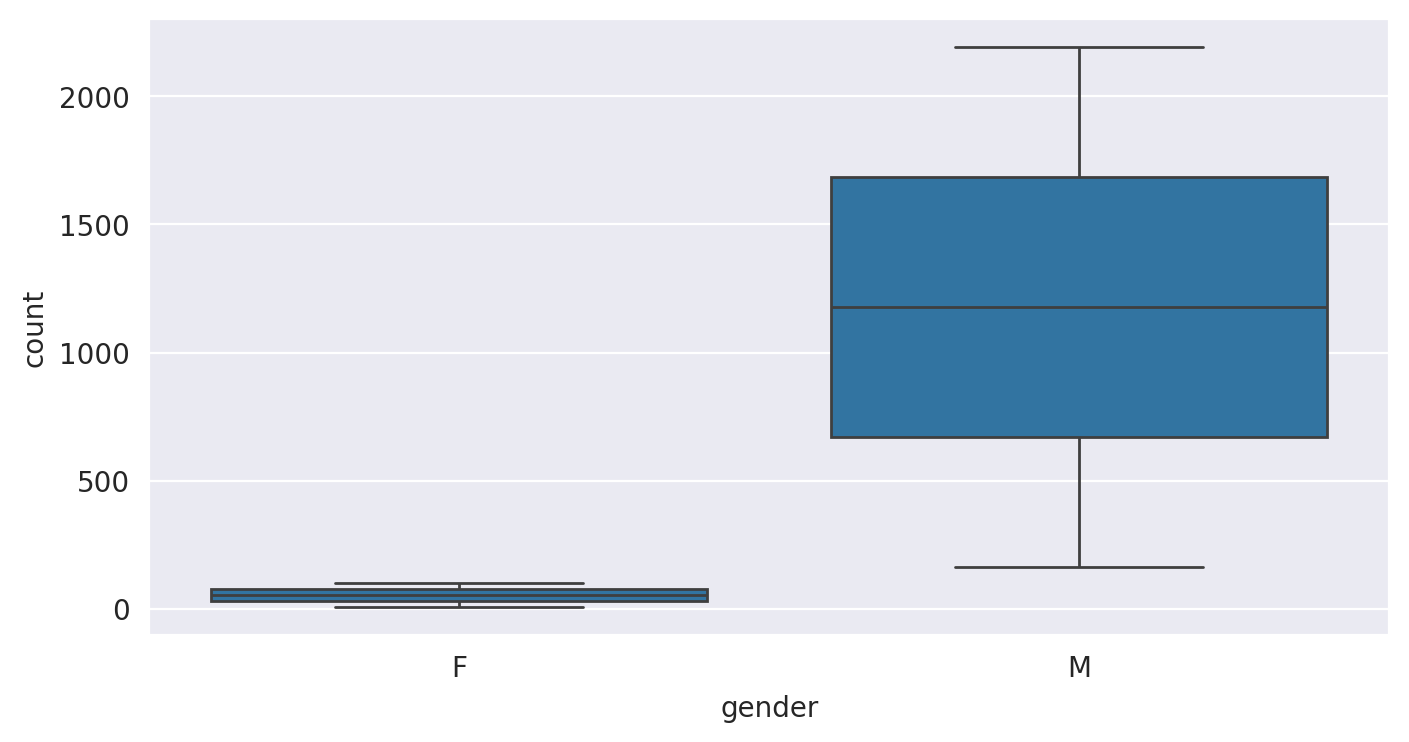

In [24]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style("darkgrid"):
    sns.boxplot(
        data=df_fatalities_by_gender,
        x="gender",
        y="count"
    )

plt.show()

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [35]:
df_fatalities_armed = df_fatalities["armed"].value_counts().reset_index()
print(df_fatalities_armed)

           armed  count
0            gun   1356
1          knife    357
2        vehicle    172
3        unarmed    170
4   undetermined    112
..           ...    ...
63    hand torch      1
64   garden tool      1
65          pole      1
66      pick-axe      1
67           pen      1

[68 rows x 2 columns]


In [70]:
bar = px.bar(
    x=df_fatalities_armed.index,
    y=df_fatalities_armed["armed"],
    title="Count of Deaths by Weapon",
    hover_name=df_fatalities_armed.index,
    color=df_fatalities_armed["armed"],
    color_continuous_scale="Agsunset"
)

bar.update_layout(
    xaxis_title="Weapon",
    yaxis_title="Deaths",
    coloraxis_showscale=False
)

bar.show()

In [37]:
armed_deaths = df_fatalities[df_fatalities["armed"] != "unarmed"]["armed"].count()
unarmed_deaths = df_fatalities[df_fatalities["armed"] == "unarmed"]["armed"].count()

print(f"Percentage Armed: {armed_deaths / (armed_deaths + unarmed_deaths) * 100}")
print(f"Percentage Unarmed: {unarmed_deaths / (armed_deaths + unarmed_deaths) * 100}")

Percentage Armed: 93.06122448979592
Percentage Unarmed: 6.938775510204081


# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [38]:
total_deaths = df_fatalities["age"].count()
deaths_under_25 = df_fatalities[df_fatalities["age"] < 25]["age"].count()

print(f"Percentage of people killed under 25: {deaths_under_25 / (total_deaths) * 100}")

Percentage of people killed under 25: 18.307567127746136


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

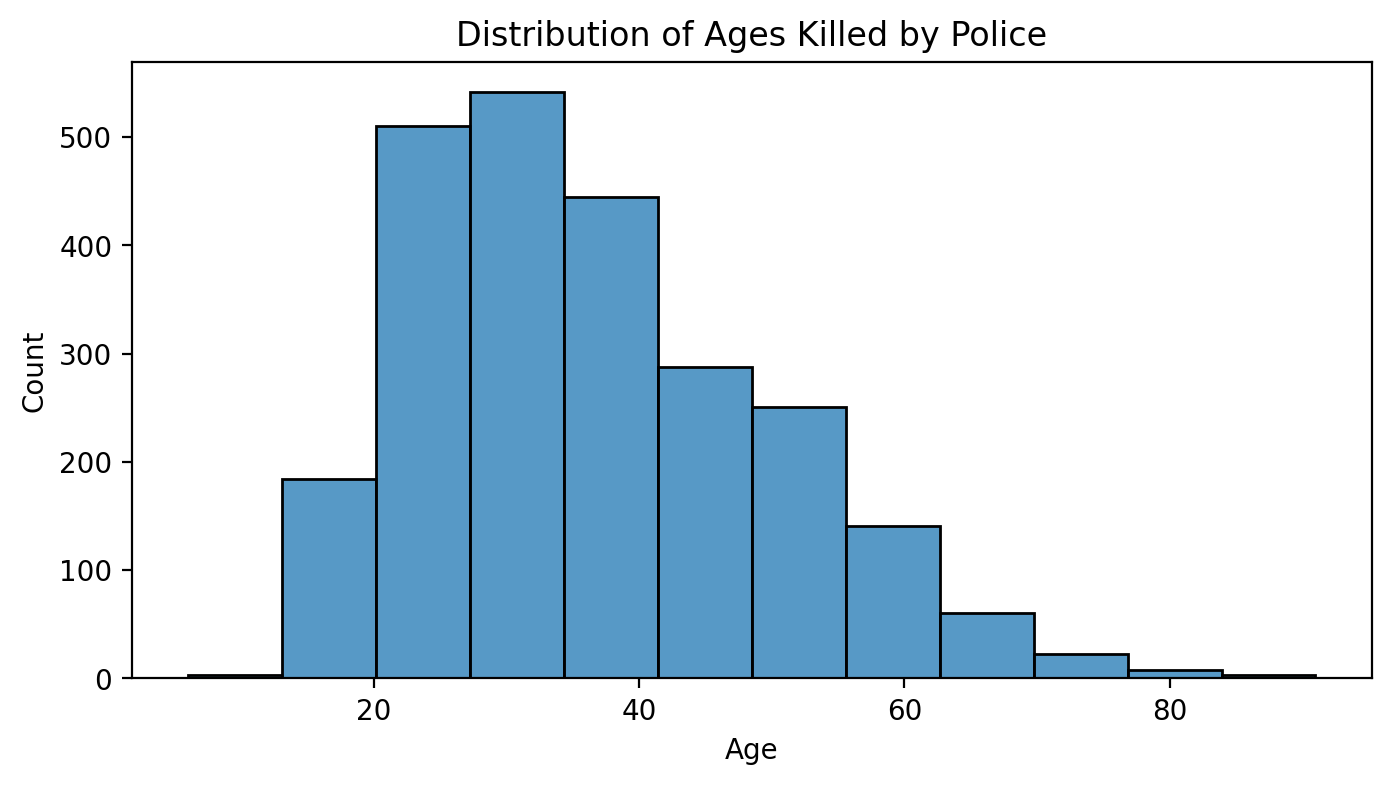

In [39]:
# Histogram
plt.figure(figsize=(8,4), dpi=200)

sns.histplot(
    data=df_fatalities,
    x=df_fatalities["age"],
    bins=12
)

plt.xlabel("Age")
plt.title("Distribution of Ages Killed by Police")
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions?

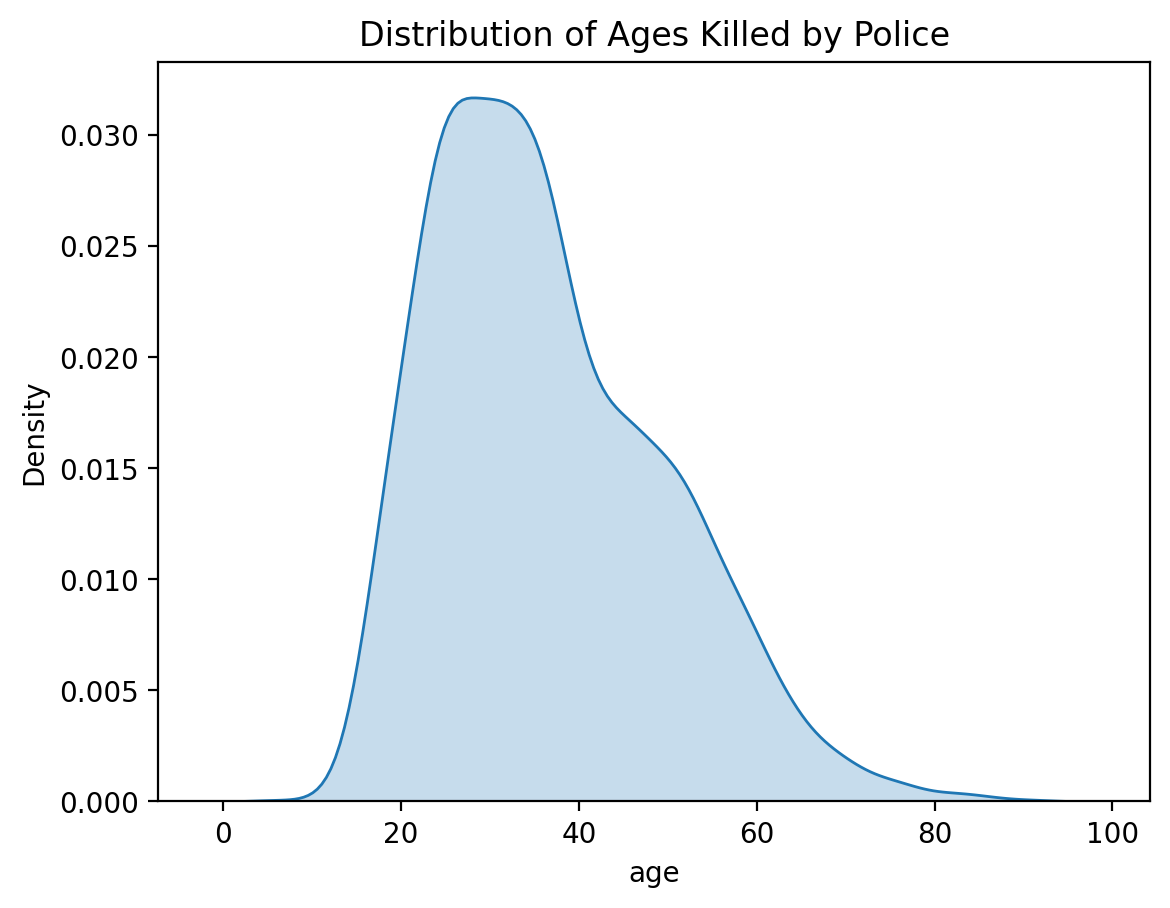

In [41]:
# KDE plot
plt.figure(dpi=200)

sns.kdeplot(
    df_fatalities["age"],
    fill=True
)

plt.title("Distribution of Ages Killed by Police")

plt.show()

<ipython-input-42-ef35c8823870>:6: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




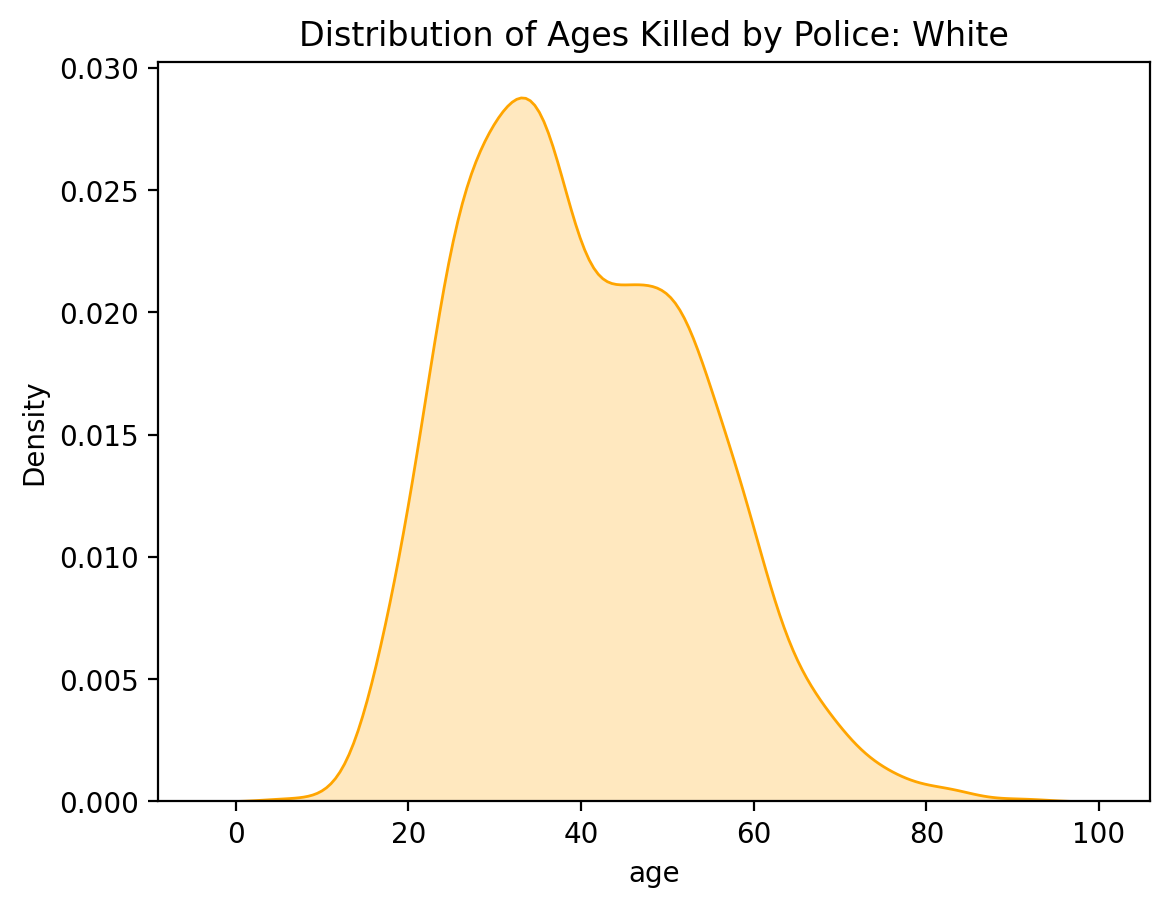

In [42]:
# White
df_fatalities_w = df_fatalities[df_fatalities["race"] == "W"]

plt.figure(dpi=200)

sns.kdeplot(
    df_fatalities_w["age"],
    fill=True,
    color="orange"
)

plt.title("Distribution of Ages Killed by Police: White")

plt.show()

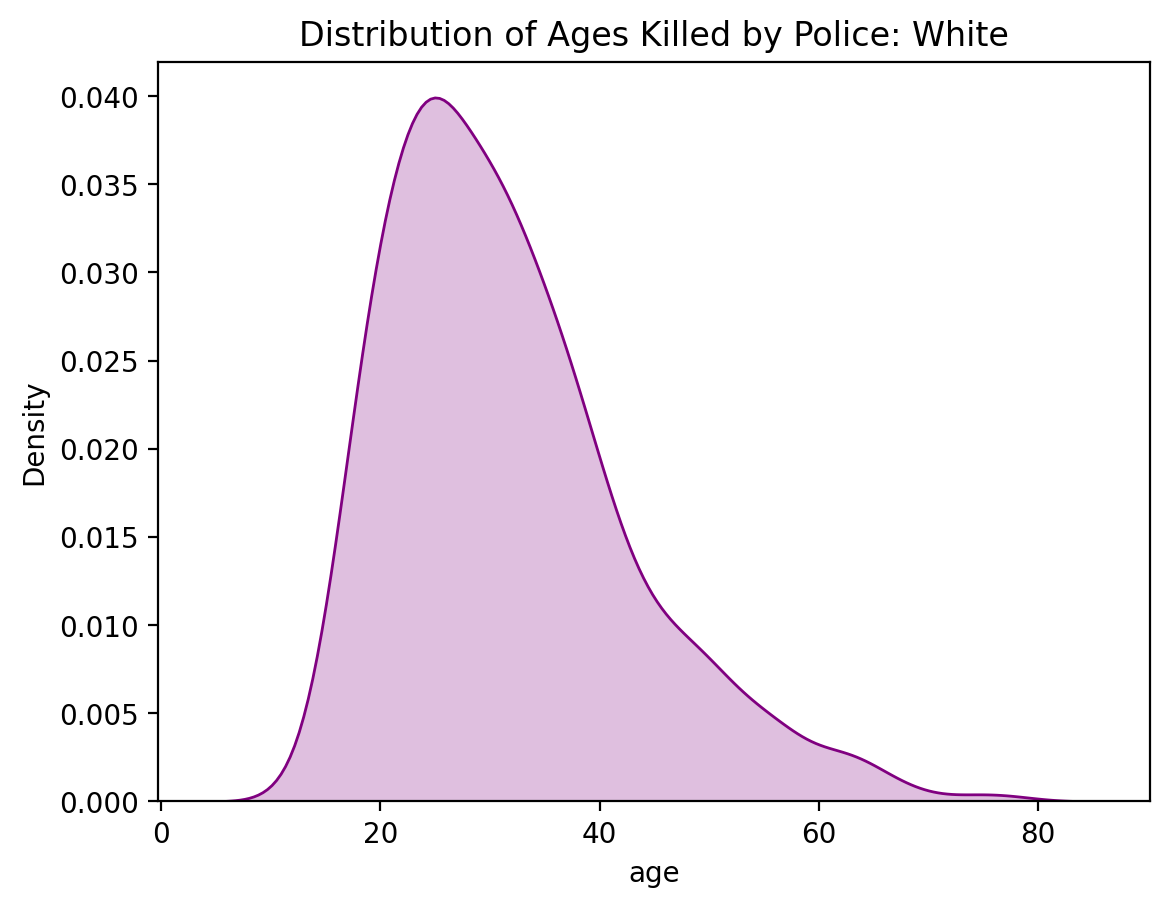

In [43]:
# Black
df_fatalities_b = df_fatalities[df_fatalities["race"] == "B"]

plt.figure(dpi=200)

sns.kdeplot(
    df_fatalities_b["age"],
    fill=True,
    color="purple"
)

plt.title("Distribution of Ages Killed by Police: White")

plt.show()

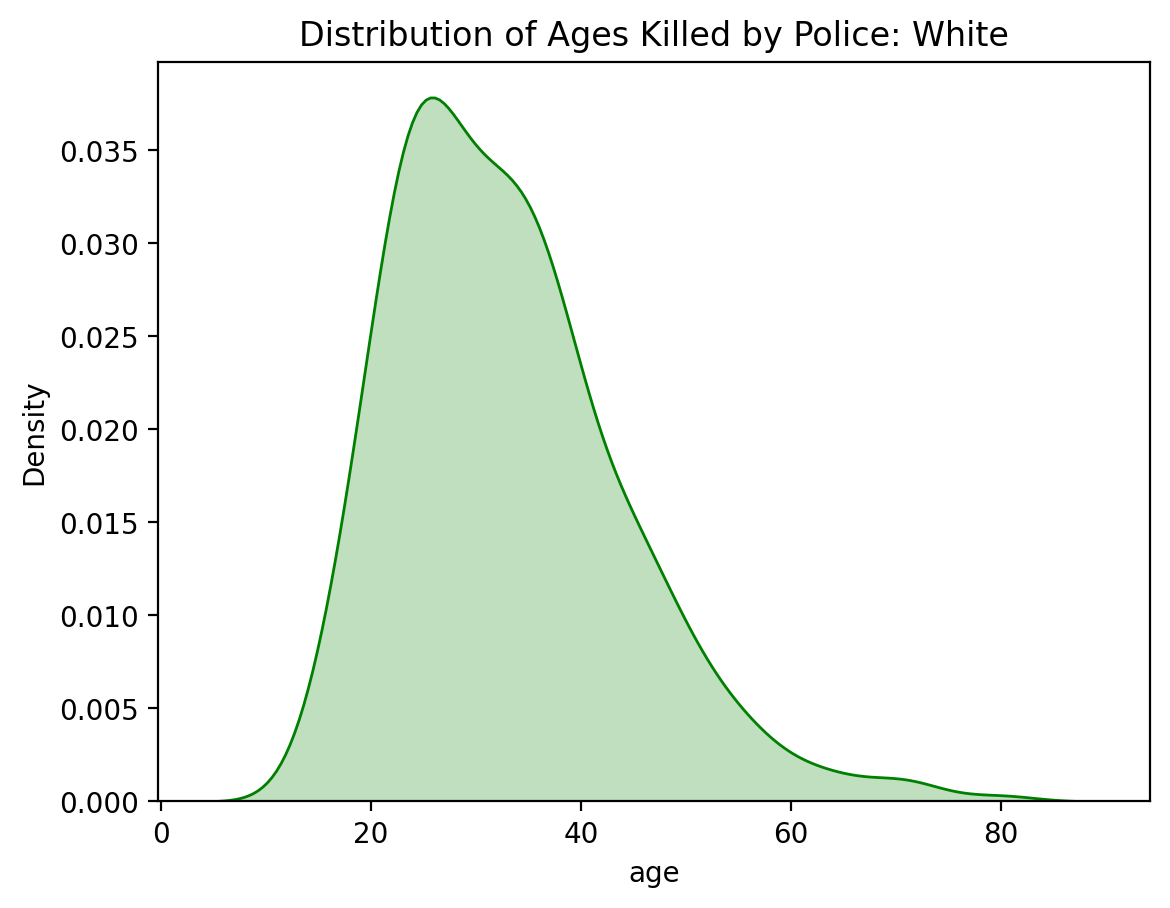

In [45]:
# Hispanic
df_fatalities_h = df_fatalities[df_fatalities["race"] == "H"]

plt.figure(dpi=200)

sns.kdeplot(
    df_fatalities_h["age"],
    fill=True,
    color="green"
)

plt.title("Distribution of Ages Killed by Police: White")

plt.show()


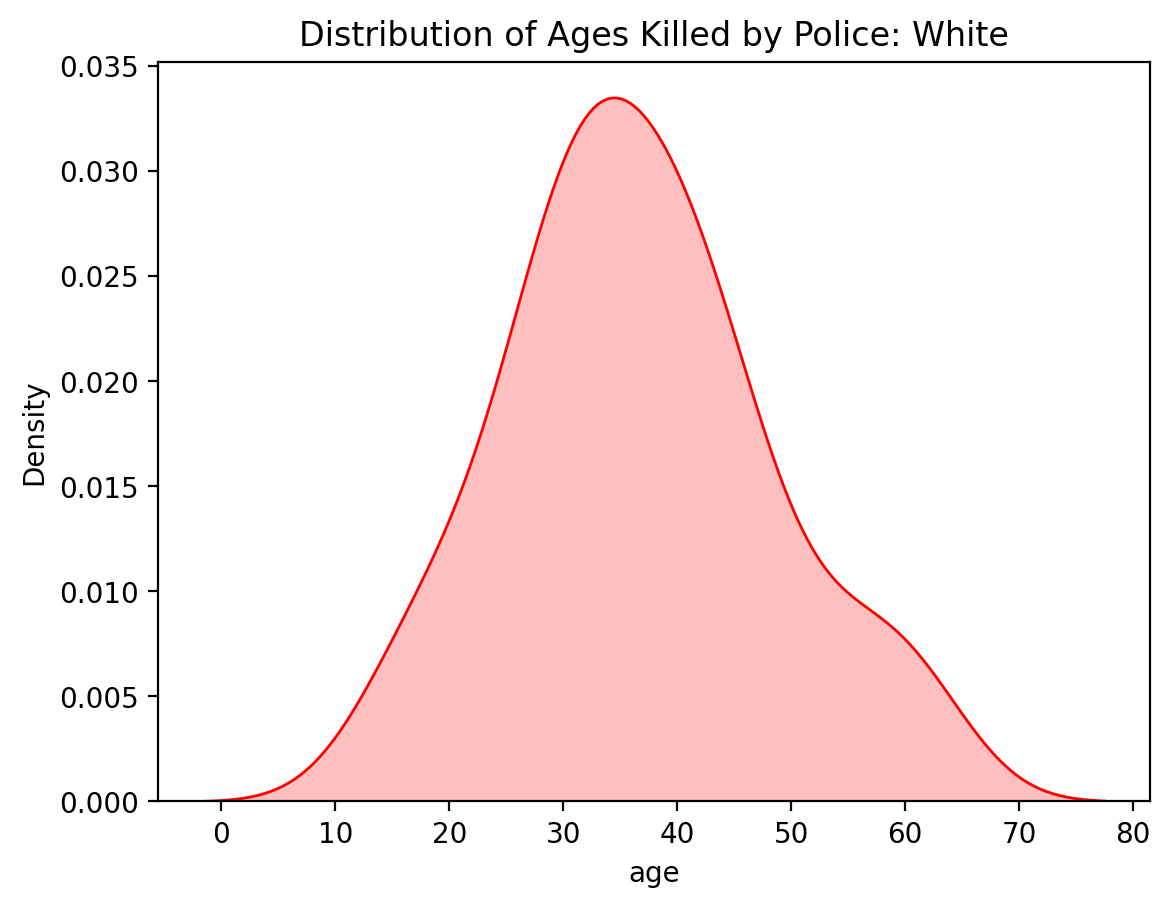

In [47]:
# Asian
df_fatalities_a = df_fatalities[df_fatalities["race"] == "A"]

plt.figure(dpi=200)

sns.kdeplot(
    df_fatalities_a["age"],
    fill=True,
    color="red"
)

plt.title("Distribution of Ages Killed by Police: White")

plt.show()

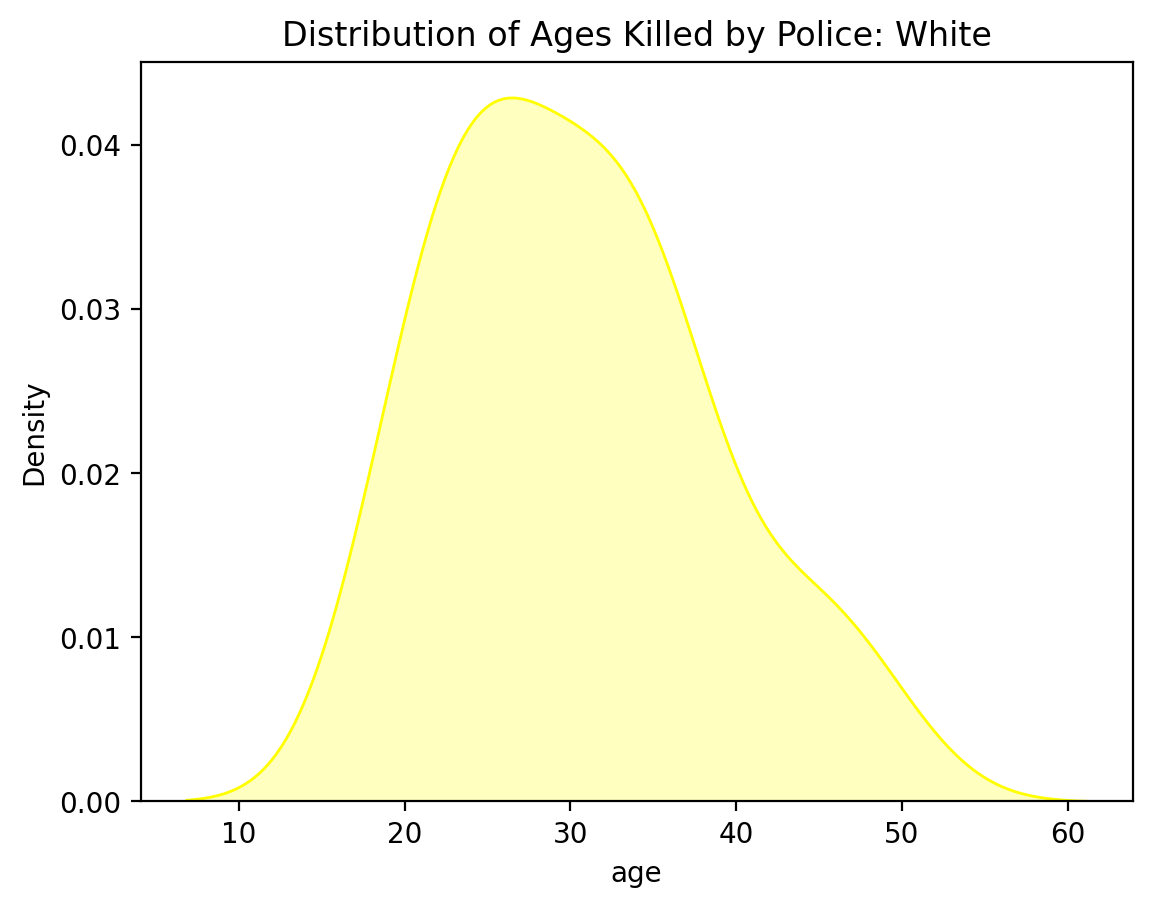

In [49]:
# Native American
df_fatalities_n = df_fatalities[df_fatalities["race"] == "N"]

plt.figure(dpi=200)

sns.kdeplot(
    df_fatalities_n["age"],
    fill=True,
    color="yellow"
)

plt.title("Distribution of Ages Killed by Police: White")

plt.show()

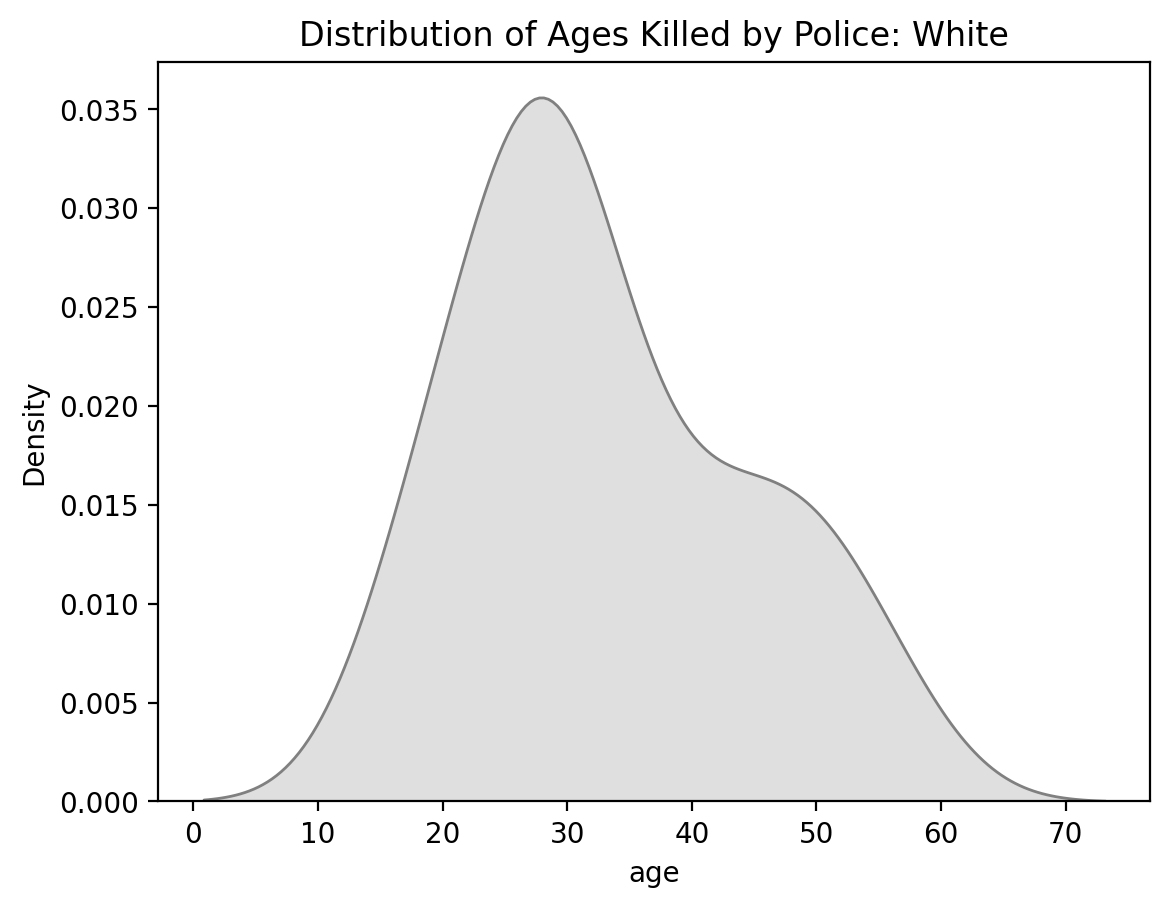

In [51]:
# Other
df_fatalities_o = df_fatalities[df_fatalities["race"] == "O"]

plt.figure(dpi=200)

sns.kdeplot(
    df_fatalities_o["age"],
    fill=True,
    color="gray"
)

plt.title("Distribution of Ages Killed by Police: White")

plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [52]:
fatalities_by_race = df_fatalities["race"].value_counts()

bar = px.bar(
    x=fatalities_by_race.index,
    y=fatalities_by_race.values,
    title="People Killed by Race",
    hover_name=fatalities_by_race.index,
    color=fatalities_by_race.values,
    color_continuous_scale="Agsunset"
)

bar.update_layout(
    xaxis_title="Race",
    yaxis_title="Deaths",
    coloraxis_showscale=False
)

bar.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [53]:
total_deaths = df_fatalities["signs_of_mental_illness"].count()
deaths_with_mental_illness = df_fatalities[df_fatalities["signs_of_mental_illness"]]["signs_of_mental_illness"].count()
print(f"Percentage of people killed with mental illness: {deaths_with_mental_illness / total_deaths * 100}")

Percentage of people killed with mental illness: 25.18307567127746


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [58]:
fatalities_by_state_top_10 = df_fatalities["state"].value_counts().reset_index()
fatalities_by_state_top_10 = fatalities_by_state_top_10.sort_values(by="state", ascending=False)
fatalities_by_state_top_10 = fatalities_by_state_top_10.head(10)

bar = px.bar(
    x=fatalities_by_state_top_10.index,
    y=fatalities_by_state_top_10["state"],
    title="People Killed by State",
    hover_name=fatalities_by_state_top_10.index,
    color=fatalities_by_state_top_10["state"],
    color_continuous_scale="Agsunset"
)

bar.update_layout(
    xaxis_title="State",
    yaxis_title="Deaths",
    coloraxis_showscale=False
)

bar.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [59]:
fatalities_by_city = df_fatalities["city"].value_counts().reset_index()
fatalities_by_city = fatalities_by_city.sort_values(by="city", ascending=False)
fatalities_by_city = fatalities_by_city.head(10)

bar = px.bar(
    x=fatalities_by_city.index,
    y=fatalities_by_city["city"],
    title="People Killed by City",
    hover_name=fatalities_by_city.index,
    color=fatalities_by_city["city"],
    color_continuous_scale="Agsunset"
)

bar.update_layout(
    xaxis_title="City",
    yaxis_title="Deaths",
    coloraxis_showscale=False
)

bar.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [61]:
fatalities_by_state = df_fatalities["state"].value_counts().reset_index()
fatalities_by_state = fatalities_by_state.sort_values(by="state", ascending=False)

df_pct_poverty_by_state

px.choropleth(
    data_frame=df_pct_poverty_by_state,
    locations='state',
    locationmode="USA-states",
    scope="usa",
    color='poverty_rate',
    color_continuous_scale='matter'
)

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [63]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'], format='%Y-%m-%d')

In [64]:
df_fatalities["year"] = pd.DatetimeIndex(df_fatalities['date']).year
df_fatalities["year"] = df_fatalities["year"].astype(int)

In [65]:
df_fatalities_by_year = df_fatalities["year"].value_counts().reset_index()
df_fatalities_by_year

,year,count
0,2015,980
1,2016,937
2,2017,541


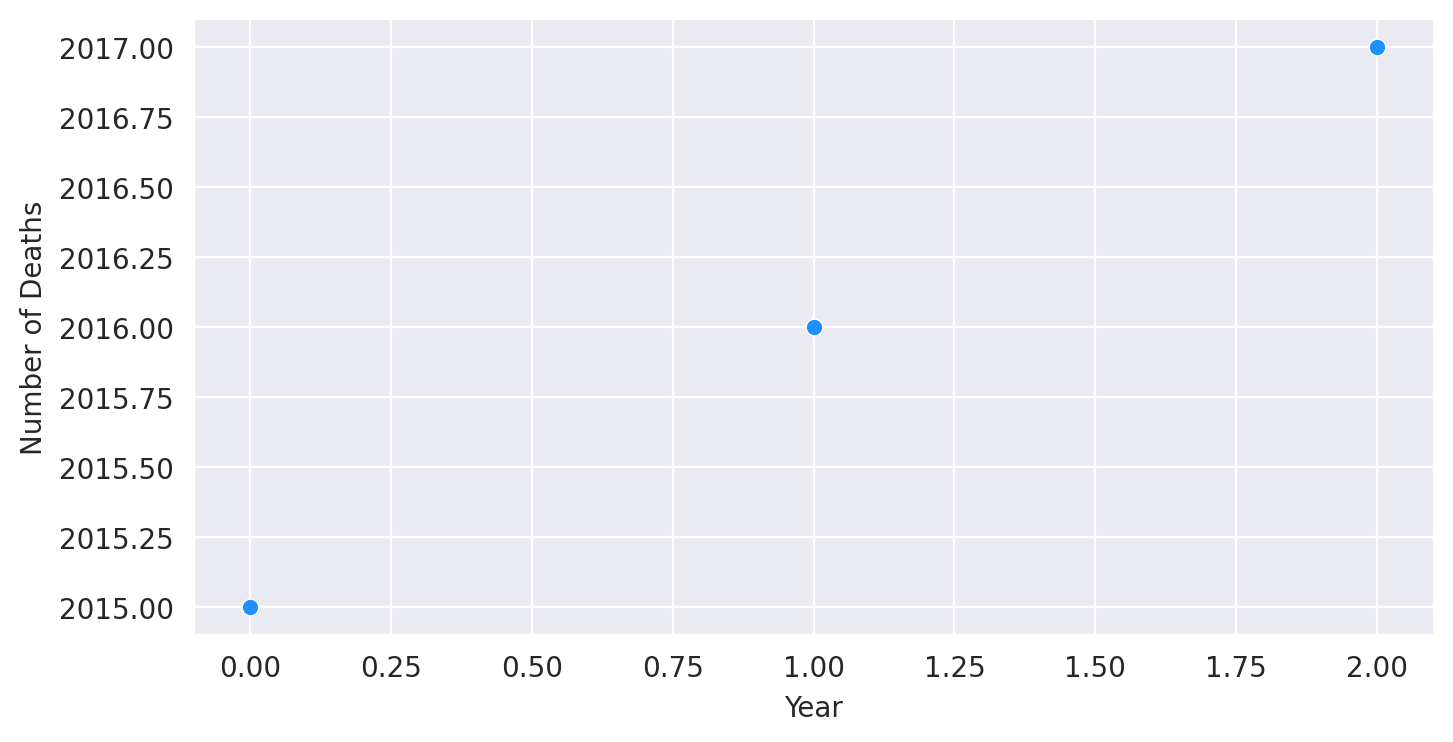

In [67]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(
        data=df_fatalities_by_year,
        x=df_fatalities_by_year.index,
        y=df_fatalities_by_year["year"],
        color="dodgerblue"
    )

    ax.set(
        xlabel="Year",
        ylabel="Number of Deaths"
    )

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).

In [68]:
print('read')

read
